# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime
import pyexasol

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

# fold

In [463]:
df3_fold = 'D:/data/big2/BD3/df'

# server

In [3]:
# # insider db
# wd = pyexasol.connect(dsn='172.29.135.35/F99FAB2444F86051A9A467F6313FAAB48AF7C4760663430958E3B89A9DC53361:8563', user='sys', password='exasol', compression=True, schema='VSYSD')
# we = pyexasol.connect(dsn='172.29.135.35/F99FAB2444F86051A9A467F6313FAAB48AF7C4760663430958E3B89A9DC53361:8563', user='sys', password='exasol', compression=True, schema='vsyse')

In [4]:
# exasol db
ws = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYS')
wd = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSD')
we = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='vsyse')

# Load
- 등록&제원 -> 4, 5등급

## 등록정보(STD_CEG_CAR_MIG) 4, 5등급만

In [5]:
# 20.2s
car = wd.export_to_pandas("SELECT VIN, BSPL_STDG_CD, VHCL_ERSR_YN, MANP_MNG_NO, EXHST_GAS_GRD_CD, YRIDNW, VHCTY_CD, PURPS_CD2, FRST_REG_YMD, VHCL_FBCTN_YMD, VHRNO FROM STD_CEG_CAR_MIG WHERE EXHST_GAS_GRD_CD = 'A0504' OR EXHST_GAS_GRD_CD = 'A05T4' OR EXHST_GAS_GRD_CD = 'A0505' OR EXHST_GAS_GRD_CD = 'A05T5';")

C:\Users\kbjung\AppData\Roaming\Python\Python39\site-packages\pyexasol\callback.py:42: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(pipe, skip_blank_lines=False, **kwargs)


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277460 entries, 0 to 4277459
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIN               object
 1   BSPL_STDG_CD      int64 
 2   VHCL_ERSR_YN      object
 3   MANP_MNG_NO       object
 4   EXHST_GAS_GRD_CD  object
 5   YRIDNW            int64 
 6   VHCTY_CD          object
 7   PURPS_CD2         object
 8   FRST_REG_YMD      int64 
 9   VHCL_FBCTN_YMD    object
 10  VHRNO             object
dtypes: int64(3), object(8)
memory usage: 359.0+ MB


In [7]:
car_ch_col = {
    'VIN':'차대번호', 
    'BSPL_STDG_CD':'법정동코드', 
    'VHCL_ERSR_YN':'차량말소YN',
    'MANP_MNG_NO':'제원관리번호', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'PURPS_CD2':'용도', 
    'FRST_REG_YMD':'최초등록일자',
    'VHCL_FBCTN_YMD':'제작일자',
    'VHRNO':'차량번호',
}

In [8]:
carr = car.rename(columns=car_ch_col)

In [9]:
carr.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호'],
      dtype='object')

## 제원정보(STD_CEG_CAR_SRC_MIG)

In [10]:
# 3.8s
src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, VHCTY_TY_CD2 FROM STD_CEG_CAR_SRC_MIG;")
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561153 entries, 0 to 561152
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MANP_MNG_NO   561153 non-null  object
 1   FUEL_CD       518235 non-null  object
 2   VHCTY_TY_CD2  546198 non-null  object
dtypes: object(3)
memory usage: 12.8+ MB


In [11]:
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'VHCTY_TY_CD2':'차종유형', 
}

In [12]:
srcr = src.rename(columns=src_ch_col)
srcr.columns

Index(['제원관리번호', '연료', '차종유형'], dtype='object')

## 정기검사(STD_TB_JGT_HIS)

In [13]:
# 3m 34.9s
# jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS WHERE rownum <= 1000;") # 테스트용
jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS;")
jgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64316863 entries, 0 to 64316862
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   VIN                     object 
 1   FDRM_INSP_INSP_MTHD_CD  object 
 2   FDRM_INSP_KND_CD        object 
 3   FDRM_INSP_JGMT          object 
 4   FDRM_NLOD_SMO_MSTVL1    float64
 5   FDRM_NLOD_SMO_MSTVL2    float64
 6   FDRM_NLOD_SMO_MSTVL3    float64
 7   FDRM_NLOD_SMO_JT_YN1    object 
 8   FDRM_INSP_YMD           int64  
 9   FDRM_DRVNG_DSTNC        float64
 10  FDRM_NLOD_SMO_PRMVL1    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 5.3+ GB


In [14]:
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_KND_CD':'검사종류', 
    'FDRM_INSP_JGMT':'검사판정', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_DRVNG_DSTNC':'주행거리',
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
}

In [15]:
jgtr = jgt.rename(columns=jgt_ch_col)
jgtr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

## 정밀검사(STD_TB_EET_HIS_ME)

In [16]:
# 6m 36.1s
# eet = wb.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_JT_YN1, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME WHERE rownum <= 1000;") # 테스트용
eet = wd.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_JT_YN1, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC, PREC_NLOD_SMO_PRMVL1 FROM STD_TB_EET_HIS_ME;")
eet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99608917 entries, 0 to 99608916
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VIN                    object 
 1   PRCINSP_MSRMT_MTHD_CD  object 
 2   PRCINSP_KND_CD         object 
 3   PRCINSP_JGMT           object 
 4   PREC_NLOD_SMO_MSTVL1   float64
 5   PREC_NLOD_SMO_MSTVL2   float64
 6   PREC_NLOD_SMO_MSTVL3   float64
 7   PREC_NLOD_SMO_JT_YN1   object 
 8   PRCINSP_YMD            int64  
 9   PRCINSP_DRVNG_DSTNC    float64
 10  PREC_NLOD_SMO_PRMVL1   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.2+ GB


In [17]:
eet.columns

Index(['VIN', 'PRCINSP_MSRMT_MTHD_CD', 'PRCINSP_KND_CD', 'PRCINSP_JGMT',
       'PREC_NLOD_SMO_MSTVL1', 'PREC_NLOD_SMO_MSTVL2', 'PREC_NLOD_SMO_MSTVL3',
       'PREC_NLOD_SMO_JT_YN1', 'PRCINSP_YMD', 'PRCINSP_DRVNG_DSTNC',
       'PREC_NLOD_SMO_PRMVL1'],
      dtype='object')

In [18]:
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_KND_CD':'검사종류', 
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_DRVNG_DSTNC':'주행거리', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
}

In [19]:
eetr = eet.rename(columns=eet_ch_col)
eetr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

## 법정동코드(STD_BJCD_INFO)

In [20]:
# 1.3s
code = wd.export_to_pandas("SELECT STDG_CD, STDG_CTPV_NM, STDG_SGG_NM FROM STD_BJCD_INFO;")
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47916 entries, 0 to 47915
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STDG_CD       47916 non-null  int64 
 1   STDG_CTPV_NM  47916 non-null  object
 2   STDG_SGG_NM   47892 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [21]:
code.columns

Index(['STDG_CD', 'STDG_CTPV_NM', 'STDG_SGG_NM'], dtype='object')

In [22]:
code_ch_col = {
    'STDG_CD':'법정동코드', 
    'STDG_CTPV_NM':'시도', 
    'STDG_SGG_NM':'시군구',  
}

In [23]:
coder = code.rename(columns=code_ch_col)
coder.columns

Index(['법정동코드', '시도', '시군구'], dtype='object')

## 저감장치 부착이력(STD_DLM_TB_ERP_ATT_HIS)

In [24]:
# 3.0s
att = wd.export_to_pandas("SELECT VIN, RDCDVC_SE_CD FROM STD_DLM_TB_ERP_ATT_HIS;")
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010946 entries, 0 to 1010945
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   VIN           1010946 non-null  object
 1   RDCDVC_SE_CD  1010946 non-null  object
dtypes: object(2)
memory usage: 15.4+ MB


In [25]:
att_ch_col = {
    'VIN':'차대번호', 
    'RDCDVC_SE_CD':'저감장치구분', 
}

In [26]:
attr = att.rename(columns=att_ch_col)
attr.columns

Index(['차대번호', '저감장치구분'], dtype='object')

## 법정동코드(STD_BJCD_INFO)

In [309]:
# 1.3s
code = wd.export_to_pandas("SELECT STDG_CD, STDG_CTPV_CD, STDG_SGG_CD, STDG_CTPV_NM, STDG_SGG_NM FROM STD_BJCD_INFO;")
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47916 entries, 0 to 47915
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STDG_CD       47916 non-null  int64 
 1   STDG_CTPV_CD  47916 non-null  int64 
 2   STDG_SGG_CD   47916 non-null  int64 
 3   STDG_CTPV_NM  47916 non-null  object
 4   STDG_SGG_NM   47892 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


In [310]:
code.columns

Index(['STDG_CD', 'STDG_CTPV_CD', 'STDG_SGG_CD', 'STDG_CTPV_NM',
       'STDG_SGG_NM'],
      dtype='object')

In [311]:
code_ch_col = {
    'STDG_CD':'법정동코드', 
    'STDG_CTPV_NM':'시도', 
    'STDG_SGG_NM':'시군구', 
    'STDG_CTPV_CD':'시도코드', 
    'STDG_SGG_CD':'시군구코드',
}

In [312]:
coder = code.rename(columns=code_ch_col)
coder.columns

Index(['법정동코드', '시도코드', '시군구코드', '시도', '시군구'], dtype='object')

## 운행제한 건수 데이터

In [27]:
# 3.0s
lmt = we.export_to_pandas("SELECT * FROM GRD5_LMT_NOCS;")
lmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408196 entries, 0 to 408195
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   차대번호    408196 non-null  object
 1   계절제_1차  408196 non-null  int64 
 2   계절제_2차  408196 non-null  int64 
 3   계절제_3차  408196 non-null  int64 
 4   계절제_4차  408196 non-null  int64 
 5   비상시     408196 non-null  int64 
 6   상시      408196 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 21.8+ MB


In [28]:
lmt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '계절제_4차', '비상시', '상시'], dtype='object')

In [29]:
lmt['운행제한건수'] = lmt[['계절제_1차', '계절제_2차', '계절제_3차', '계절제_4차', '비상시', '상시']].sum(axis=1)
lmt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,계절제_4차,비상시,상시,운행제한건수
0,000000JN44C000673,0,0,9,0,1,0,10
1,01451201380,0,0,0,0,0,0,0
2,01751300580,0,1,0,0,0,0,1
3,01761300921,0,0,0,0,0,0,0
4,01761301128,0,0,1,0,0,0,1


## 4등급 result(for DPF유무)

In [30]:
# 3.0s
rs = we.export_to_pandas("SELECT 차대번호, DPF유무_수정 FROM GRD4_RESULT;")
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   차대번호      1502235 non-null  object
 1   DPF유무_수정  1153813 non-null  object
dtypes: object(2)
memory usage: 22.9+ MB


## STD_KOSIS

In [31]:
kosis = we.export_to_pandas("SELECT CTPV, SGG, VHCTY_CD, DY_AVRG_DRVNG_DSTNC FROM STD_KOSIS;")
kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CTPV                 1230 non-null   object 
 1   SGG                  1230 non-null   object 
 2   VHCTY_CD             1230 non-null   object 
 3   DY_AVRG_DRVNG_DSTNC  1230 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.6+ KB


In [32]:
kosis_ch_col = {
    'CTPV':'시도', 
    'SGG':'시군구', 
    'VHCTY_CD':'차종', 
    'DY_AVRG_DRVNG_DSTNC':'일일평균주행거리', 
}

In [33]:
kosisr = kosis.rename(columns=kosis_ch_col)
kosisr.columns

Index(['시도', '시군구', '차종', '일일평균주행거리'], dtype='object')

In [34]:
kosisr.head()

,시도,시군구,차종,일일평균주행거리
0,서울특별시,소계,합계,36.60
1,서울특별시,소계,승용,33.90
2,서울특별시,소계,승합,48.30
3,서울특별시,소계,화물,54.40
4,서울특별시,소계,특수,49.30


# 전처리

## 중복 차대번호 제거

In [35]:
carr.shape, len(carr['차대번호'].unique())

((4277460, 11), 4277361)

In [36]:
carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
carr = carr.sort_values('최초등록일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
carr.shape

(4277361, 11)

## 배출가스등급 코드 변환

In [37]:
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carr['배출가스등급'] = carr['배출가스등급'].replace(grd_dict)
carr['배출가스등급'].unique()

array(['5', '4'], dtype=object)

## 차종 코드 변환

In [38]:
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carr['차종'] = carr['차종'].replace(cd_dict)
carr['차종'].unique()

array(['화물', '승합', '승용', '특수', nan], dtype=object)

## 용도 코드 변환

In [39]:
purps_dict = {
    'A08P':'개인용', 
    'A08B':'영업용', 
    'A08O':'관용',
}
carr['용도'] = carr['용도'].replace(purps_dict)
carr['용도'].unique()

array(['개인용', '영업용', '관용'], dtype=object)

## 등록정보 말소 제거

In [40]:
carm = carr[carr['차량말소YN'] == 'N'].reset_index(drop=True)
carm.shape

(2678048, 11)

## 연료 코드 변환

In [41]:
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
srcr['연료'] = srcr['연료'].replace(fuel_dict)
srcr['연료'].unique()

array(['경유', '휘발유', 'CNG(압축천연가스)', nan, 'LPG(액화석유가스)', '기타연료',
       '휘발유 하이브리드', '전기', '알코올', '태양열', 'CNG 하이브리드', '등유', '경유 하이브리드',
       'LPG 하이브리드', '수소', 'LNG(액화천연가스)'], dtype=object)

## 차종유형 코드 변환

In [42]:
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)
srcr['차종유형'].unique()

array(['대형', '소형', '중형', '경형', nan], dtype=object)

## 저감장치구분 코드 변환

In [43]:
# 4m 14.3s
attr['저감장치구분'].unique()

array(['A1001', 'A1003', 'A1005', 'A1006', 'A1002', 'A1004', 'A1007'],
      dtype=object)

In [44]:
# 27.5s
rdcdvc_dict = {
    'A1001':'1종', 
    'A1002':'2종', 
    'A1003':'3종', 
    'A1004':'1종+SCR', 
    'A1005':'엔진개조', 
    'A1006':'엔진교체',
    'A1007':'삼원촉매',
}
attr['저감장치구분'] = attr['저감장치구분'].replace(rdcdvc_dict)
attr['저감장치구분'].unique()

array(['1종', '3종', '엔진개조', '엔진교체', '2종', '1종+SCR', '삼원촉매'], dtype=object)

## 저감장치 부착 유무

In [45]:
attr.loc[(attr['저감장치구분'] == '1종') | (attr['저감장치구분'] == '1종+SCR'), 'DPF_YN'] = '유'

In [46]:
attr['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN    531833
유      479113
Name: count, dtype: int64

## 등록&제원 병합

In [47]:
# 0.7s
cs = carm.merge(srcr, on='제원관리번호', how='left')
cs.shape

(2678048, 13)

## 정기&정밀 병합

In [48]:
jgtr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

In [49]:
eetr.columns

Index(['차대번호', '검사방법', '검사종류', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연판정1', '검사일자', '주행거리', '무부하매연허용치1'],
      dtype='object')

In [50]:
jgtr['정기정밀'] = '정기'
eetr['정기정밀'] = '정밀'

In [51]:
# 3m 1.9s
ins = pd.concat([jgtr, eetr], ignore_index=True)
ins.shape

(163925780, 12)

### 최근 검사만 활용

In [52]:
# 4m 14.3s
insm = ins.sort_values('검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
insm.shape

(34114272, 12)

## 검사종류 코드 변환

In [53]:
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
insm['검사종류'] = insm['검사종류'].replace(knd_dict)
insm['검사종류'].unique()

array(['종합검사', '종합검사(경과)', '1부재검사(종합)', '2부재검사(종합)', '정기검사', '재검사(1부재검사)',
       '재검사(2부재검사)', '정기(경과)검사', nan, '배출재검사(구변)', '구조변경검사',
       '종합(정밀) 1부재검사', '종합(정밀) 2부재검사', '종합(정밀)', '종합(경과:정밀)', '정밀검사',
       'A21C01', '특정재검사(배출)', '임시검사', '배출재검사', '관능재검사', '특정재검사(관능)',
       '특정검사', '정밀검사(경과)', '특정검사(경과)', 'A21R05', 'A21R06', '관능재검사(임시)',
       'A21E03'], dtype=object)

## 검사방법 코드 변환

In [54]:
# 14.9s
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
insm['검사방법'] = insm['검사방법'].replace(mth_dict)
insm['검사방법'].unique()

array(['무부하검사(급가속)', '부하검사(KD-147)', '부하검사(ASM-Idling)', '부하검사(LUG DOWN)',
       '무부하검사(TSI)', '무부하검사(정지가동)', '부하검사(ASM2525)'], dtype=object)

## 등록&제원&정기&정밀 병합

In [55]:
# 2m 0.5s
csi = cs.merge(insm, on='차대번호', how='left')
csi.shape

(2678048, 24)

In [56]:
csi.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀'],
      dtype='object')

## 등록&제원&정기&정밀&법정동 병합

In [57]:
csi.shape

(2678048, 24)

In [58]:
csic = csi.merge(coder, on='법정동코드', how='left')
csic.shape

(2678048, 26)

In [59]:
csic['시도'].isnull().sum()

2

In [60]:
csic.loc[csic['시도'].isnull() == True, '법정동코드']

1844569    4165052000
2426597    4163055000
Name: 법정동코드, dtype: int64

In [61]:
# 주소 수정
csic.loc[csic['법정동코드'] == 4165052000, ['시도', '시군구']] = ['경기도', '포천시'] # 경기도 포천시 선단동
csic.loc[csic['법정동코드'] == 4163055000, ['시도', '시군구']] = ['경기도', '양주시'] # 경기도 양주시 회천3동

In [62]:
csic['시도'].isnull().sum()

0

## 등록&제원&정기&정밀&법정동&저감 병합

In [63]:
csic.shape

(2678048, 26)

In [64]:
attr.shape

(1010946, 3)

In [65]:
attr = attr.drop_duplicates('차대번호').reset_index(drop=True)
attr.shape

(1009373, 3)

In [66]:
csica = csic.merge(attr, on='차대번호', how='left')
csica.shape

(2678048, 28)

## 등록&제원&정기&정밀&법정동&저감&운행제한건수 병합

In [67]:
csica.shape

(2678048, 28)

In [68]:
df = csica.merge(lmt[['차대번호', '운행제한건수']], on='차대번호', how='left')
df.shape

(2678048, 29)

## 저감장치 부착 여부 result로 수정

## 4등급 result 파일 참고하여 DPF유무 수정

In [69]:
rdf = df.copy()

In [70]:
len(set(rdf['차대번호'].unique()) - set(rs['차대번호'].unique()))

1215495

In [71]:
rdf['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN    2358952
유       319096
Name: count, dtype: int64

In [72]:
rs['DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
무       879481
NaN     348422
유       261897
확인불가     12435
Name: count, dtype: int64

In [73]:
rs = rs.drop_duplicates('차대번호').reset_index(drop=True)
rs.shape

(1502213, 2)

In [74]:
rdf1 = rdf.merge(rs, on='차대번호', how='left')

In [75]:
rdf1.loc[(rdf1['DPF_YN'] == '유') | (rdf1['DPF유무_수정'] == '유'), 'DPF_YN'] = '유'
rdf1.loc[(rdf1['DPF유무_수정'] == '무'), 'DPF_YN'] = '무'
rdf1.loc[(rdf1['DPF유무_수정'] == '확인불가'), 'DPF_YN'] = '확인불가'

In [76]:
rdf1['DPF_YN'].value_counts(dropna=False)

DPF_YN
NaN     1244853
무        839835
유        580927
확인불가      12433
Name: count, dtype: int64

In [77]:
rdf1.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수',
       'DPF유무_수정'],
      dtype='object')

In [78]:
df = rdf1.drop('DPF유무_수정', axis=1)

In [79]:
df.shape

(2678048, 29)

# 전처리

## 일일평균주행거리 계산

In [80]:
df['최초등록일자'].describe()

count    2678048.00
mean    20035942.32
std        68449.91
min     19501231.00
25%     20000417.00
50%     20060619.00
75%     20090414.00
max     20220711.00
Name: 최초등록일자, dtype: float64

In [81]:
df['검사일자'].describe()

count    2145620.00
mean    20211122.55
std        32137.85
min     20020520.00
25%     20210923.00
50%     20220617.00
75%     20230102.00
max     20230605.00
Name: 검사일자, dtype: float64

In [82]:
df['주행거리'].dtype

dtype('float64')

In [83]:
df['최초등록일자'] = pd.to_datetime(df['최초등록일자'], format="%Y%m%d", errors='coerce')
df['최초등록일자'].head()

0   2022-07-11
1   2022-06-14
2   2022-04-19
3   2022-04-13
4   2022-04-07
Name: 최초등록일자, dtype: datetime64[ns]

In [84]:
df['검사일자'] = pd.to_datetime(df['검사일자'], format="%Y%m%d", errors='coerce')
df['검사일자'].head()

0          NaT
1          NaT
2   2023-03-30
3   2023-05-23
4   2023-05-23
Name: 검사일자, dtype: datetime64[ns]

In [169]:
today_date = datetime.today().strftime("%Y-%m-%d")
df['현재날짜'] = today_date
df['현재날짜'] = pd.to_datetime(df['현재날짜'], format='%Y-%m-%d', errors='coerce')
df['현재날짜'].head()

0   2023-07-21
1   2023-07-21
2   2023-07-21
3   2023-07-21
4   2023-07-21
Name: 현재날짜, dtype: datetime64[ns]

In [171]:
df['최근검사경과일'] = df['현재날짜'] - df['검사일자']
df['최근검사경과일'].head()

0   113 days
1    59 days
2    59 days
3   345 days
4   324 days
Name: 최근검사경과일, dtype: timedelta64[ns]

In [172]:
df['최근검사경과일'] = df['최근검사경과일'].astype('str')
df['최근검사경과일'].head()

0    113 days
1     59 days
2     59 days
3    345 days
4    324 days
Name: 최근검사경과일, dtype: object

In [173]:
df['최근검사경과일'] = df['최근검사경과일'].str.split(' ').str[0]
df['최근검사경과일'] = pd.to_numeric(df['최근검사경과일'], errors='coerce')
df['최근검사경과일'].head()

0   113.00
1    59.00
2    59.00
3   345.00
4   324.00
Name: 최근검사경과일, dtype: float64

In [174]:
df['등록일기준검사일'] = df['검사일자'] - df['최초등록일자']
df['등록일기준검사일'] = df['등록일기준검사일'].astype('str')
df['등록일기준검사일'] = df['등록일기준검사일'].str.split(' ').str[0]
df['등록일기준검사일'] = pd.to_numeric(df['등록일기준검사일'], errors='coerce')

In [175]:
df['등록일기준검사일'].describe()

count   2145620.00
mean       5439.40
std        1417.53
min       -3628.00
25%        4410.00
50%        5128.00
75%        6026.00
max       22197.00
Name: 등록일기준검사일, dtype: float64

In [176]:
df['일일평균주행거리'] = df['주행거리'] / df['등록일기준검사일']
df['일일평균주행거리'].head()

0    13.84
1   559.55
2   193.25
3   151.01
4   416.88
Name: 일일평균주행거리, dtype: float64

In [177]:
df['일일평균주행거리'].isnull().sum()

533498

## KOSIS 데이터 활용 일일평균주행거리 수정

### 빈 값 kosis로 대체

In [178]:
df1y = df[df['일일평균주행거리'].isnull() == False]
df1n = df[df['일일평균주행거리'].isnull() == True]
df1y.shape, df1n.shape

((2144550, 33), (533498, 33))

In [179]:
df1n = df1n.drop('일일평균주행거리', axis=1)

In [180]:
df1nm = df1n.merge(kosisr, on=['시도', '시군구', '차종'], how='left')
df1nm['일일평균주행거리'].isnull().sum()

2158

In [181]:
df2y = df1nm[df1nm['일일평균주행거리'].isnull() == False]
df2n = df1nm[df1nm['일일평균주행거리'].isnull() == True]

In [182]:
df2n = df2n.drop('일일평균주행거리', axis=1)

In [183]:
df2nm = df2n.merge(kosisr.drop_duplicates(['시도', '차종'])[['시도', '차종', '일일평균주행거리']], on=['시도', '차종'], how='left')

In [184]:
df3y = df2nm[df2nm['일일평균주행거리'].isnull() == False]
df3n = df2nm[df2nm['일일평균주행거리'].isnull() == True]

In [185]:
df3n.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

In [186]:
kosisr.columns

Index(['시도', '시군구', '차종', '일일평균주행거리'], dtype='object')

In [187]:
kosisr['차종'].unique()

array(['합계', '승용', '승합', '화물', '특수'], dtype=object)

In [188]:
for ctpv, sgg, cd in df3n.loc[df3n['일일평균주행거리'].isnull() == True, ['시도', '시군구', '차종']].values:
        df3n.loc[(df3n['일일평균주행거리'].isnull() == True) & (df3n['시도'] == ctpv) & (df3n['시군구'] == sgg), '일일평균주행거리'] = kosisr.loc[(kosisr['시도'] == ctpv) & (kosisr['시군구'] == '소계') & (kosisr['차종'] == '합계'), '일일평균주행거리'].values[0]

In [189]:
df3n['일일평균주행거리'].isnull().sum()

0

In [190]:
df2nm = pd.concat([df3y, df3n], ignore_index=True)

In [191]:
df1nm = pd.concat([df2y, df2nm], ignore_index=True)

In [192]:
df = pd.concat([df1y, df1nm], ignore_index=True)

In [193]:
df['일일평균주행거리'].isnull().sum()

0

## 4, 5등급 분리

In [194]:
df.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

In [195]:
df['배출가스등급'].unique()

array(['4', '5'], dtype=object)

In [196]:
g4 = df.loc[df['배출가스등급'] == '4'].reset_index(drop=True)
g5 = df.loc[df['배출가스등급'] == '5'].reset_index(drop=True)
g4.shape, g5.shape

((1515737, 33), (1162311, 33))

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [197]:
g4.loc[g4['차량번호'] == '31고7134', '연료']

1227859    경유
Name: 연료, dtype: object

In [198]:
g4.loc[g4['차량번호'] == '31고7134', '연료'] = '휘발유'

# 전처리

In [199]:
g4['연료'].value_counts(dropna=False)

연료
경유             1156239
휘발유             333207
LPG(액화석유가스)      26179
NaN                 71
기타연료                39
CNG(압축천연가스)          1
알코올                  1
Name: count, dtype: int64

In [200]:
g4['배출가스등급'].value_counts(dropna=False)

배출가스등급
4    1515737
Name: count, dtype: int64

In [345]:
gm4d = g4.loc[g4['연료'] == '경유'].reset_index(drop=True)
gm4d.shape

(1156239, 33)

In [346]:
gm4r = g4.loc[g4['연료'] != '경유'].reset_index(drop=True)
gm4r.shape

(359498, 33)

In [347]:
gm4d.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

## 5등급 경유차 추출(gm5d)

In [348]:
g5['연료'].value_counts(dropna=False)

연료
경유             1131764
휘발유              30053
LPG(액화석유가스)        436
NaN                 27
기타연료                25
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [349]:
g5['배출가스등급'].value_counts(dropna=False)

배출가스등급
5    1162311
Name: count, dtype: int64

In [350]:
gm5d = g5.loc[g5['연료'] == '경유'].reset_index(drop=True)
gm5d.shape

(1131764, 33)

In [351]:
gm5r = g5.loc[g5['연료'] != '경유'].reset_index(drop=True)
gm5r.shape

(30547, 33)

In [352]:
gm5d.columns

Index(['차대번호', '법정동코드', '차량말소YN', '제원관리번호', '배출가스등급', '차량연식', '차종', '용도',
       '최초등록일자', '제작일자', '차량번호', '연료', '차종유형', '검사방법', '검사종류', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연판정1', '검사일자', '주행거리',
       '무부하매연허용치1', '정기정밀', '시도', '시군구', '저감장치구분', 'DPF_YN', '운행제한건수', '현재날짜',
       '최근검사경과일', '등록일기준검사일', '일일평균주행거리'],
      dtype='object')

## 필수 컬럼 추출

In [353]:
gm4d = gm4d.rename(columns={'차량연식':'연식', 'DPF_YN':'저감장치'})

In [354]:
gm4d = gm4d[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치', 
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
gm4d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수'],
      dtype='object')

In [355]:
gm5d = gm5d.rename(columns={'차량등록번호':'차량번호', '본거지법정동코드':'법정동코드', '차량연식':'연식', 'DPF_YN':'저감장치'})

In [356]:
gm5d = gm5d[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
gm5d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수'],
      dtype='object')

# 이상값 추출

In [357]:
gm4d['운행제한건수'].isnull().sum()

1156216

In [358]:
gm4d['운행제한건수'] = gm4d['운행제한건수'].fillna(0)
gm4d['운행제한건수'].isnull().sum()

0

In [359]:
gm5d['운행제한건수'].isnull().sum()

827858

In [360]:
gm5d['운행제한건수'] = gm5d['운행제한건수'].fillna(0)
gm5d['운행제한건수'].isnull().sum()

0

In [361]:
gm4d.shape, gm5d.shape

((1156239, 12), (1131764, 12))

In [362]:
idx4 = set(gm4d.index)
len(idx4)

1156239

In [363]:
idx5 = set(gm5d.index)
len(idx5)

1131764

## A급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1이상

In [470]:
idx4a = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] >= 1)].index
len(idx4a)

0

In [471]:
gm4da = gm4d.loc[idx4a]
gm4da['우선순위'] = 1
gm4da.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위


In [472]:
idx5a = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] >= 1)].index
len(idx5a)

15701

In [473]:
gm5da = gm5d.loc[idx5a]
gm5da['우선순위'] = 1
gm5da.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위
57,KNAJC52182A082279,04보1352,4122025041,2002,개인용,승용,대형,NaN,8.00,-1394.53,1661.00,8.00,1
82,KMHMJ81VP3U191659,65주9741,4785025000,2003,개인용,승용,중형,NaN,8.00,-185.70,2150.00,1.00,1
87,KPBFA2AF15P147164,58주3416,2720010300,2005,개인용,승용,대형,NaN,14.00,-221.84,2520.00,1.00,1
88,KNAJE55135K097976,27루3463,4125010600,2005,개인용,승용,중형,NaN,4.00,-256.62,2293.00,1.00,1
90,KNAJC52133A161560,27루2798,1117012400,2003,개인용,승용,대형,NaN,10.00,-403.50,2222.00,7.00,1


## B급
- 최근검사경과일 365*3 = 1095 초과 또는 최근검사경과일 없는 경우
- 운행제한건수 1미만

In [474]:
idx4b = gm4d.loc[((gm4d['최근검사경과일'] > 1095) | (gm4d['최근검사경과일'].isnull() == True)) & (gm4d['운행제한건수'] < 1)].index
len(idx4b)

33851

In [475]:
gm4db = gm4d.loc[idx4b]
gm4db['우선순위'] = 2
gm4db.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위
20,KNHMB76438S243174,70보0919,4122025041,2008,개인용,승합,중형,NaN,10.00,-284.82,1740.00,0.00,2
25,KNME5C2MM8P006761,112무9587,4125010300,2008,개인용,승용,중형,유,0.00,-952.69,1294.00,0.00,2
48,KNHMB76438S237215,75누4809,4122032027,2008,개인용,승합,중형,NaN,5.00,-1122.85,1521.00,0.00,2
64,KLACA26RD8B185772,27주6938,4513040000,2008,개인용,승용,중형,NaN,0.00,-269.02,2023.00,0.00,2
70,KLACA26RD6B001897,54주8409,4122025041,2006,개인용,승용,중형,NaN,2.00,-453.47,1822.00,0.00,2


In [476]:
idx5b = gm5d.loc[((gm5d['최근검사경과일'] > 1095) | (gm5d['최근검사경과일'].isnull() == True)) & (gm5d['운행제한건수'] < 1)].index
len(idx5b)

413860

In [477]:
gm5db = gm5d.loc[idx5b]
gm5db['우선순위'] = 2
gm5db.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위
51,KPBLC2AC13P191538,55오2201,4122025041,2003,개인용,승용,대형,NaN,4.00,-2155.20,1606.00,0.00,2
52,KPBCH3AB16P016724,45라6726,2720010300,2006,개인용,승용,중형,NaN,0.00,-4544.14,1592.00,0.00,2
53,KNAJE55135K021161,17마1400,4122032027,2005,개인용,승용,중형,NaN,17.00,-952.16,1702.00,0.00,2
54,KMHSD81VP4U806323,04보2492,4122025041,2004,개인용,승용,중형,NaN,21.00,-498.59,1890.00,0.00,2
55,KPBFA2AD14P098256,16수1620,4122025041,2004,개인용,승용,대형,NaN,10.00,-304.01,1997.00,0.00,2


## C급
- 최근검사경과일 365*3 = 1095 이하

In [478]:
idx4c = gm4d.loc[gm4d['최근검사경과일'] <= 1095].index
len(idx4c)

1122388

In [479]:
gm4dc = gm4d.loc[idx4c]
gm4dc['우선순위'] = 3
gm4dc.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위
0,KMFLA18KP8C031274,92도0997,4482533000,2008,개인용,화물,대형,확인불가,7.00,13.84,113.00,0.00,3
1,KMCGK17HP9C112030,93루6527,4518010400,2009,개인용,화물,중형,유,5.00,193.25,59.00,0.00,3
2,KNCSE01429K388374,87너9428,2771026522,2009,개인용,화물,소형,무,14.00,151.01,345.00,0.00,3
3,KNFSE0A439K387582,96구5391,3020011900,2009,개인용,화물,소형,무,0.00,416.88,324.00,0.00,3
4,KNCSE01429K388695,96구5394,2626010300,2009,개인용,화물,소형,무,7.00,79.89,228.00,0.00,3


In [480]:
idx5c = gm5d.loc[gm5d['최근검사경과일'] <= 1095].index
len(idx5c)

702203

In [481]:
gm5dc = gm5d.loc[idx5c]
gm5dc['우선순위'] = 3
gm5dc.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위
0,KL3C3AHF27K000068,84라1558,4372033032,2007,개인용,화물,대형,NaN,0.00,559.55,59.00,0.00,3
1,KMCYSS7JP7U084697,99도4857,4423038028,2007,개인용,특수,중형,NaN,9.00,31.29,352.00,0.00,3
2,KMFZCD7HP6U177736,88더0229,4413310800,2006,개인용,화물,중형,유,13.00,269.69,375.00,0.00,3
3,KL3C3AHF27K000062,83노0270,4792025023,2007,개인용,화물,대형,NaN,8.00,332.99,185.00,0.00,3
4,KMCGK17PP7C072513,90로1655,3171034000,2007,개인용,화물,중형,NaN,3.00,28.17,51.00,0.00,3


# 분석

## 가중치 설정을 위한 상관계수 확인
- 선별 조건(4가지)
    - 매연
    - 일일평균주행거리
    - 최근검사경과일
    - 운행제한단속건수

In [482]:
gm4di = gm4dc.copy()
gm5di = gm5dc.copy()

In [483]:
gm4di.shape, gm5di.shape

((1122388, 13), (702203, 13))

### 4등급 경유 C급

In [484]:
gm4di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위'],
      dtype='object')

In [485]:
gm4di['일일평균주행거리'].isnull().sum()

0

In [486]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [487]:
gm4di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [488]:
gm4di[col].isnull().sum()

무부하매연측정치1    9403
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [489]:
gm4di[col] = gm4di[col].fillna(0)
gm4di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [490]:
gm4di_corr = gm4di[col].corr()
gm4di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00,-0.00,-0.03,-0.00
일일평균주행거리,-0.00,1.00,-0.02,0.01
최근검사경과일,-0.03,-0.02,1.00,-0.00
운행제한건수,-0.00,0.01,-0.00,1.00


#### 4등급 경유차 선별조건 상관계수

In [491]:
t4 = pd.concat([gm4di_corr, gm4di_corr.sum()], axis=1)
t4 = t4.rename(columns={0:'합계'})
t4 = t4.reset_index()
t4

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00,-0.00,-0.03,-0.00,0.96
1,일일평균주행거리,-0.00,1.00,-0.02,0.01,0.99
2,최근검사경과일,-0.03,-0.02,1.00,-0.00,0.94
3,운행제한건수,-0.00,0.01,-0.00,1.00,1.01


In [492]:
t4.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [493]:
today_date = datetime.today().strftime("%Y%d%m")
today_date

'20232107'

In [494]:
t4['테이블생성일자'] = today_date

In [495]:
chc_col = {
    '테이블생성일자':'LOAD_DT', 
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [496]:
STD_BD_GRD4_DS_CRRLTN_CFFCNT = t4.rename(columns=chc_col)
STD_BD_GRD4_DS_CRRLTN_CFFCNT

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT,LOAD_DT
0,무부하매연측정치1,1.00,-0.00,-0.03,-0.00,0.96,20232107
1,일일평균주행거리,-0.00,1.00,-0.02,0.01,0.99,20232107
2,최근검사경과일,-0.03,-0.02,1.00,-0.00,0.94,20232107
3,운행제한건수,-0.00,0.01,-0.00,1.00,1.01,20232107


##### [출력] STD_BD_GRD4_DS_CRRLTN_CFFCNT

In [497]:
# expdf = STD_BD_GRD4_DS_CRRLTN_CFFCNT
# table_nm = 'STD_BD_GRD4_DS_CRRLTN_CFFCNT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [498]:
# # 7.6s
# # BD3-3_4등급경유차_상관계수
# STD_BD_GRD4_DS_CRRLTN_CFFCNT.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_DS_CRRLTN_CFFCNT.csv'), index=False)

#### 4등급 경유차 선별포인트

In [499]:
gm4di_corr.sum()[col]

무부하매연측정치1   0.96
일일평균주행거리    0.99
최근검사경과일     0.94
운행제한건수      1.01
dtype: float64

In [500]:
c1, c2, c3, c4 = gm4di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.24670998466603042,
 0.25247545810342764,
 0.24188302654159793,
 0.2589315306889439)

In [501]:
gm4di['선별포인트'] = np.round(w1 * gm4di['무부하매연측정치1'] + w2 * gm4di['일일평균주행거리'] + w3 * gm4di['최근검사경과일'] + w4 * gm4di['운행제한건수'] , 0)
gm4di['선별포인트'].isnull().sum()

0

In [502]:
gm4di.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head(10)

,차량번호,차종,선별포인트
1117,서울88아7380,화물,1014.00
1600,경기99아2305,특수,799.00
1371,경북98사8301,특수,738.00
561094,22소6078,승용,690.00
422150,경남82아9185,화물,624.00
382280,73조2921,승합,605.00
364497,경기91바3784,화물,605.00
200531,경기94아9304,화물,603.00
451100,충북80자4400,화물,586.00
350379,경북86아3625,화물,562.00


In [503]:
gm4di['선별포인트'].describe()

count   1122388.00
mean        104.94
std          57.23
min          11.00
25%          56.00
50%          98.00
75%         150.00
max        1014.00
Name: 선별포인트, dtype: float64

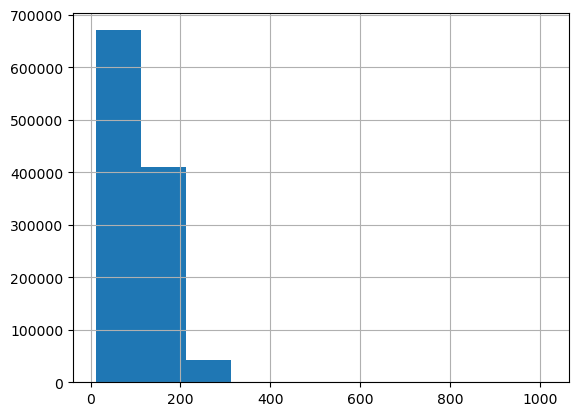

In [504]:
gm4di['선별포인트'].hist();

In [505]:
gm4di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트'],
      dtype='object')

In [506]:
gm4di.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위,선별포인트
0,KMFLA18KP8C031274,92도0997,4482533000,2008,개인용,화물,대형,확인불가,7.00,13.84,113.00,0.00,3,33.00
1,KMCGK17HP9C112030,93루6527,4518010400,2009,개인용,화물,중형,유,5.00,193.25,59.00,0.00,3,64.00
2,KNCSE01429K388374,87너9428,2771026522,2009,개인용,화물,소형,무,14.00,151.01,345.00,0.00,3,125.00
3,KNFSE0A439K387582,96구5391,3020011900,2009,개인용,화물,소형,무,0.00,416.88,324.00,0.00,3,184.00
4,KNCSE01429K388695,96구5394,2626010300,2009,개인용,화물,소형,무,7.00,79.89,228.00,0.00,3,77.00


In [507]:
gm4d.shape

(1156239, 12)

In [508]:
gm4da.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위'],
      dtype='object')

In [509]:
gm4db.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위'],
      dtype='object')

In [510]:
gm4di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트'],
      dtype='object')

In [511]:
gm4da['선별포인트'] = np.nan
gm4db['선별포인트'] = np.nan

In [512]:
total4d = pd.concat([gm4da, gm4db, gm4di], ignore_index=True)
total4d.shape

(1156239, 14)

In [513]:
total4d.tail()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위,선별포인트
1156234,KNHMB76438S241297,73나5109,1138010600,2008,개인용,승합,중형,무,0.00,55.60,143.00,0.00,3,49.00
1156235,KMJWAH7JP8U005342,74라7121,5011012700,2008,개인용,승합,중형,무,0.00,50.20,233.00,0.00,3,69.00
1156236,KMHJN81VP7U547491,41로6416,4211012000,2007,개인용,승용,중형,NaN,0.00,35.20,221.00,0.00,3,62.00
1156237,KMHJN81VP6U436152,06버6715,4684025622,2006,개인용,승용,중형,NaN,0.00,39.40,466.00,0.00,3,123.00
1156238,KMHJM81VP6U374353,04로6836,4873032023,2006,개인용,승용,중형,유,0.00,45.60,538.00,0.00,3,142.00


In [514]:
total4d['우선순위'].isnull().sum()

0

In [515]:
total4d['테이블생성일자'] = today_date

In [516]:
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT = total4d[[
    '테이블생성일자', 
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '우선순위',
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]

In [517]:
chc_col = {
    '테이블생성일자':'LOAD_DT', 
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', 
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '우선순위':'PRIO_GRD', 
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_백만원':'SPRT_CST',
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [518]:
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT = STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.rename(columns=chc_col)
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.columns

Index(['LOAD_DT', 'VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'PRIO_GRD', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [519]:
STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.shape

(1156239, 14)

##### [출력] STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT

In [520]:
# expdf = STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT
# table_nm = 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [521]:
# # 7.6s
# # BD3-3_4등급경유차_우선차량선별
# STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

### 5등급 경유 C급

In [522]:
gm5di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위'],
      dtype='object')

In [523]:
gm5di['일일평균주행거리'].isnull().sum()

0

In [524]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [525]:
gm5di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [526]:
gm5di[col].isnull().sum()

무부하매연측정치1    6522
일일평균주행거리        0
최근검사경과일         0
운행제한건수          0
dtype: int64

In [527]:
# nan 값 0으로 채우기
gm5di[col] = gm5di[col].fillna(0)
gm5di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [528]:
gm5di_corr = gm5di[col].corr()
gm5di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00,-0.02,0.02,-0.03
일일평균주행거리,-0.02,1.00,0.01,0.01
최근검사경과일,0.02,0.01,1.00,0.02
운행제한건수,-0.03,0.01,0.02,1.00


#### 5등급 경유차 선별조건 상관계수

In [529]:
t5 = pd.concat([gm5di_corr, gm5di_corr.sum()], axis=1)
t5 = t5.rename(columns={0:'합계'})
t5 = t5.reset_index()
t5

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00,-0.02,0.02,-0.03,0.97
1,일일평균주행거리,-0.02,1.00,0.01,0.01,1.00
2,최근검사경과일,0.02,0.01,1.00,0.02,1.04
3,운행제한건수,-0.03,0.01,0.02,1.00,1.01


In [530]:
t5.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [531]:
t5['테이블생성일자'] = today_date

In [532]:
chc_col = {
    '테이블생성일자':'LOAD_DT', 
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [533]:
STD_BD_GRD5_DS_CRRLTN_CFFCNT = t5.rename(columns=chc_col)
STD_BD_GRD5_DS_CRRLTN_CFFCNT

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT,LOAD_DT
0,무부하매연측정치1,1.00,-0.02,0.02,-0.03,0.97,20232107
1,일일평균주행거리,-0.02,1.00,0.01,0.01,1.00,20232107
2,최근검사경과일,0.02,0.01,1.00,0.02,1.04,20232107
3,운행제한건수,-0.03,0.01,0.02,1.00,1.01,20232107


##### [출력] STD_BD_GRD5_DS_CRRLTN_CFFCNT

In [534]:
# expdf = STD_BD_GRD5_DS_CRRLTN_CFFCNT
# table_nm = 'STD_BD_GRD5_DS_CRRLTN_CFFCNT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [535]:
# # 5.5s
# # BD3-3_5등급경유차_상관계수
# STD_BD_GRD5_DS_CRRLTN_CFFCNT.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_DS_CRRLTN_CFFCNT.csv'), index=False)

In [536]:
gm5di_corr.sum()[col]

무부하매연측정치1   0.97
일일평균주행거리    1.00
최근검사경과일     1.04
운행제한건수      1.01
dtype: float64

In [537]:
c1, c2, c3, c4 = gm5di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.24208202275845486,
 0.2489301697165691,
 0.2589149485503192,
 0.25007285897465675)

In [538]:
gm5di['선별포인트'] = np.round(w1 * gm5di['무부하매연측정치1'] + w2 * gm5di['일일평균주행거리'] + w3 * gm5di['최근검사경과일'] + w4 * gm5di['운행제한건수'], 0)
gm5di['선별포인트'].isnull().sum()

0

In [539]:
gm5di['선별포인트'].describe()

count   702203.00
mean       119.91
std         75.88
min         12.00
25%         60.00
50%        107.00
75%        171.00
max      25491.00
Name: 선별포인트, dtype: float64

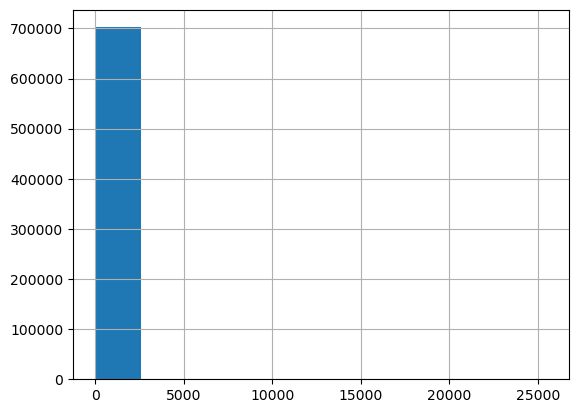

In [540]:
gm5di['선별포인트'].hist();

#### 5등급 경유차 선별포인트 샘플

In [541]:
gm5di.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트'],
      dtype='object')

In [542]:
gm5di['저감장치'].value_counts()

저감장치
유    229948
Name: count, dtype: int64

In [543]:
gm5di.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위,선별포인트
0,KL3C3AHF27K000068,84라1558,4372033032,2007,개인용,화물,대형,NaN,0.00,559.55,59.00,0.00,3,155.00
1,KMCYSS7JP7U084697,99도4857,4423038028,2007,개인용,특수,중형,NaN,9.00,31.29,352.00,0.00,3,101.00
2,KMFZCD7HP6U177736,88더0229,4413310800,2006,개인용,화물,중형,유,13.00,269.69,375.00,0.00,3,167.00
3,KL3C3AHF27K000062,83노0270,4792025023,2007,개인용,화물,대형,NaN,8.00,332.99,185.00,0.00,3,133.00
4,KMCGK17PP7C072513,90로1655,3171034000,2007,개인용,화물,중형,NaN,3.00,28.17,51.00,0.00,3,21.00


In [544]:
export5 = gm5di[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '우선순위', 
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export5.shape

(702203, 14)

In [545]:
export5 = export5.sort_values(['선별포인트'], ascending=False)
export5.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,우선순위,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
742950,KMYKP17CPYU414954,05루9403,2871025022,2000,개인용,승용,중형,NaN,3,25491.00,21.00,102073.36,298.00,0.00
622369,410234338117,90더7549,4137010300,2002,개인용,화물,대형,유,3,570.00,0.00,1278.55,974.00,0.00
62314,KMFGA17PP7C067736,서울85바5177,1150010500,2007,영업용,화물,중형,NaN,3,513.00,12.00,1629.00,403.00,0.00
627797,KNAJC52182A074788,26서8185,4217010300,2002,개인용,승용,대형,NaN,3,497.00,999.90,28.81,956.00,0.00
96674,KL3K9AWF17K000036,88마1220,4139013200,2007,개인용,화물,대형,NaN,3,492.00,2.00,1420.26,504.00,28.00


In [546]:
gm5d.shape

(1131764, 12)

In [547]:
gm5da['선별포인트'] = np.nan
gm5db['선별포인트'] = np.nan
gm5da = gm5da[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '우선순위', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]
gm5db = gm5db[['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '우선순위', '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']]

In [548]:
total5d = pd.concat([gm5da, gm5db, export5], ignore_index=True)
total5d.shape

(1131764, 14)

In [549]:
total5d.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,우선순위,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
0,KNAJC52182A082279,04보1352,4122025041,2002,개인용,승용,대형,NaN,1,NaN,8.00,-1394.53,1661.00,8.00
1,KMHMJ81VP3U191659,65주9741,4785025000,2003,개인용,승용,중형,NaN,1,NaN,8.00,-185.70,2150.00,1.00
2,KPBFA2AF15P147164,58주3416,2720010300,2005,개인용,승용,대형,NaN,1,NaN,14.00,-221.84,2520.00,1.00
3,KNAJE55135K097976,27루3463,4125010600,2005,개인용,승용,중형,NaN,1,NaN,4.00,-256.62,2293.00,1.00
4,KNAJC52133A161560,27루2798,1117012400,2003,개인용,승용,대형,NaN,1,NaN,10.00,-403.50,2222.00,7.00


In [550]:
total5d['우선순위'].isnull().sum()

0

In [551]:
total5d['테이블생성일자'] = today_date

In [552]:
chc_col = {
    '테이블생성일자':'LOAD_DT', 
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', # 연식
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '저감장치':'RDCDVC',
    '우선순위':'PRIO_GRD',
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_조기폐차_백만원':'SPRT_CST_ELPDSRC',
    '지원비용_DPF_백만원':'SPRT_CST_DPF', 
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [553]:
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT = total5d.rename(columns=chc_col)
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'RDCDVC', 'PRIO_GRD', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS',
       'LOAD_DT'],
      dtype='object')

In [554]:
STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.shape

(1131764, 15)

##### [출력] STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT

In [555]:
# expdf = STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT
# table_nm = 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [556]:
# # 5.5s
# # BD3-3_5등급경유차_우선차량선별
# STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

## 저공해조치선별

In [557]:
total4d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트', '테이블생성일자'],
      dtype='object')

In [558]:
total4d.shape

(1156239, 15)

In [559]:
lem4d = total4d.merge(coder[['법정동코드', '시도']], on='법정동코드', how='left')
lem4d.shape

(1156239, 16)

In [560]:
lem4d['시도'].isnull().sum()

0

In [561]:
total5d.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '우선순위',
       '선별포인트', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '테이블생성일자'],
      dtype='object')

In [562]:
total5d.shape

(1131764, 15)

In [563]:
lem5d = total5d.merge(coder[['법정동코드', '시도']], on='법정동코드', how='left')
lem5d.shape

(1131764, 16)

In [564]:
lem5d['시도'].isnull().sum()

1

In [565]:
lem5d.loc[lem5d['시도'].isnull(), '법정동코드']

119195    4165052000
Name: 법정동코드, dtype: int64

In [566]:
lem5d.loc[lem5d['법정동코드'] == 4165052000, '시도'] = '경기도' # 경기도 포천시 선단동

In [567]:
lem5d['시도'].isnull().sum()

0

In [568]:
lem4d['배출가스등급'] = '4'
lem5d['배출가스등급'] = '5'

In [569]:
lem = pd.concat([lem4d, lem5d], ignore_index=True)
lem.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트', '테이블생성일자', '시도',
       '배출가스등급'],
      dtype='object')

In [570]:
grp1 = lem.groupby(['시도', '배출가스등급', '차종', '차종유형', '우선순위']).agg({'차대번호':'count'}).unstack('우선순위').reset_index()
grp1.columns = ['시도', '배출가스등급', '차종', '차종유형', '1순위(대수)', '2순위(대수)', '3순위(대수)']
grp1[['1순위(대수)', '2순위(대수)', '3순위(대수)']] = grp1[['1순위(대수)', '2순위(대수)', '3순위(대수)']].fillna(0)
grp1['합계'] = grp1.iloc[:, -3:].sum(axis=1)
grp1['1순위(비율)'] = grp1['1순위(대수)'] / grp1['합계']
grp1['2순위(비율)'] = grp1['2순위(대수)'] / grp1['합계']
grp1['3순위(비율)'] = grp1['3순위(대수)'] / grp1['합계']
grp1 = grp1[['시도', '배출가스등급', '차종', '차종유형', '합계', '1순위(대수)', '1순위(비율)', '2순위(대수)', '2순위(비율)', '3순위(대수)', '3순위(비율)']]
grp1 = grp1.rename(columns={'합계':'선별대수'})
grp1

,시도,배출가스등급,차종,차종유형,선별대수,1순위(대수),1순위(비율),2순위(대수),2순위(비율),3순위(대수),3순위(비율)
0,강원도,4,승용,대형,6353.00,0.00,0.00,94.00,0.01,6259.00,0.99
1,강원도,4,승용,소형,723.00,0.00,0.00,21.00,0.03,702.00,0.97
2,강원도,4,승용,중형,12276.00,0.00,0.00,189.00,0.02,12087.00,0.98
3,강원도,4,승합,대형,126.00,0.00,0.00,30.00,0.24,96.00,0.76
4,강원도,4,승합,중형,4967.00,0.00,0.00,117.00,0.02,4850.00,0.98
...,...,...,...,...,...,...,...,...,...,...,...
391,충청북도,5,특수,소형,60.00,1.00,0.02,19.00,0.32,40.00,0.67
392,충청북도,5,특수,중형,258.00,2.00,0.01,74.00,0.29,182.00,0.71
393,충청북도,5,화물,대형,3900.00,77.00,0.02,1025.00,0.26,2798.00,0.72
394,충청북도,5,화물,소형,14585.00,63.00,0.00,6281.00,0.43,8241.00,0.57


In [571]:
grp2 = lem.groupby(['시도', '배출가스등급', '차종', '차종유형']).agg({'저감장치':'count'}).reset_index()
grp2 = grp2.rename(columns={'저감장치':'저감장치부착대수'})
grp2

,시도,배출가스등급,차종,차종유형,저감장치부착대수
0,강원도,4,승용,대형,6206
1,강원도,4,승용,소형,657
2,강원도,4,승용,중형,11756
3,강원도,4,승합,대형,117
4,강원도,4,승합,중형,4817
...,...,...,...,...,...
391,충청북도,5,특수,소형,5
392,충청북도,5,특수,중형,44
393,충청북도,5,화물,대형,2053
394,충청북도,5,화물,소형,2078


In [572]:
grp = grp1.merge(grp2, on=['시도', '배출가스등급', '차종', '차종유형'], how='left')
grp.shape

(396, 12)

In [573]:
grp

,시도,배출가스등급,차종,차종유형,선별대수,1순위(대수),1순위(비율),2순위(대수),2순위(비율),3순위(대수),3순위(비율),저감장치부착대수
0,강원도,4,승용,대형,6353.00,0.00,0.00,94.00,0.01,6259.00,0.99,6206
1,강원도,4,승용,소형,723.00,0.00,0.00,21.00,0.03,702.00,0.97,657
2,강원도,4,승용,중형,12276.00,0.00,0.00,189.00,0.02,12087.00,0.98,11756
3,강원도,4,승합,대형,126.00,0.00,0.00,30.00,0.24,96.00,0.76,117
4,강원도,4,승합,중형,4967.00,0.00,0.00,117.00,0.02,4850.00,0.98,4817
...,...,...,...,...,...,...,...,...,...,...,...,...
391,충청북도,5,특수,소형,60.00,1.00,0.02,19.00,0.32,40.00,0.67,5
392,충청북도,5,특수,중형,258.00,2.00,0.01,74.00,0.29,182.00,0.71,44
393,충청북도,5,화물,대형,3900.00,77.00,0.02,1025.00,0.26,2798.00,0.72,2053
394,충청북도,5,화물,소형,14585.00,63.00,0.00,6281.00,0.43,8241.00,0.57,2078


In [574]:
grp['테이블생성일자'] = today_date

In [575]:
grp.columns.to_list()

['시도',
 '배출가스등급',
 '차종',
 '차종유형',
 '선별대수',
 '1순위(대수)',
 '1순위(비율)',
 '2순위(대수)',
 '2순위(비율)',
 '3순위(대수)',
 '3순위(비율)',
 '저감장치부착대수',
 '테이블생성일자']

In [576]:
cdict = {
    '시도':'CTPV',
    '배출가스등급':'EXHST_GAS_GRD_CD',
    '차종':'VHCTY_CD',
    '차종유형':'VHCTY_TY',
    '선별대수':'SELCT_MKCNT',
    '1순위(대수)':'SENO1_MKCNT',
    '1순위(비율)':'SENO1_RT',
    '2순위(대수)':'SENO2_MKCNT',
    '2순위(비율)':'SENO2_RT',
    '3순위(대수)':'SENO3_MKCNT',
    '3순위(비율)':'SENO3_RT',
    '저감장치부착대수':'RDCDVC_EXTRNS_MKCNT',
    '테이블생성일자':'LOAD_DT', 
}
STD_BD_DAT_LEM_SELCT = grp.rename(columns=cdict)
STD_BD_DAT_LEM_SELCT.columns

Index(['CTPV', 'EXHST_GAS_GRD_CD', 'VHCTY_CD', 'VHCTY_TY', 'SELCT_MKCNT',
       'SENO1_MKCNT', 'SENO1_RT', 'SENO2_MKCNT', 'SENO2_RT', 'SENO3_MKCNT',
       'SENO3_RT', 'RDCDVC_EXTRNS_MKCNT', 'LOAD_DT'],
      dtype='object')

In [577]:
STD_BD_DAT_LEM_SELCT.columns.to_list()

['CTPV',
 'EXHST_GAS_GRD_CD',
 'VHCTY_CD',
 'VHCTY_TY',
 'SELCT_MKCNT',
 'SENO1_MKCNT',
 'SENO1_RT',
 'SENO2_MKCNT',
 'SENO2_RT',
 'SENO3_MKCNT',
 'SENO3_RT',
 'RDCDVC_EXTRNS_MKCNT',
 'LOAD_DT']

### [출력] STD_BD_DAT_LEM_SELCT

In [578]:
# expdf = STD_BD_DAT_LEM_SELCT
# table_nm = 'STD_BD_DAT_LEM_SELCT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [579]:
# 0s
STD_BD_DAT_LEM_SELCT.to_csv(os.path.join(df3_fold, 'STD_BD_DAT_LEM_SELCT.csv'), index=False)

## 선별포인트현황

In [580]:
lem.columns

Index(['차대번호', '차량번호', '법정동코드', '연식', '용도', '차종', '차종유형', '저감장치', '무부하매연측정치1',
       '일일평균주행거리', '최근검사경과일', '운행제한건수', '우선순위', '선별포인트', '테이블생성일자', '시도',
       '배출가스등급'],
      dtype='object')

In [581]:
lem['선별포인트'].describe()

count   1824591.00
mean        110.70
std          65.45
min          11.00
25%          57.00
50%         101.00
75%         158.00
max       25491.00
Name: 선별포인트, dtype: float64

In [583]:
[x for x in range(0, 350, 50)]

[0, 50, 100, 150, 200, 250, 300]

In [584]:
for n in range(0, 350, 50):
    if n <= 300:
        lem.loc[(lem['선별포인트'] >= n) & (lem['선별포인트'] < n + 50), '선별포인트구간'] = f'{n} ~ {n+49}'
    else:
        lem.loc[lem['선별포인트'] >= n, '선별포인트구간'] = f'{n}이상'

In [586]:
lem.tail()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,저감장치,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,우선순위,선별포인트,테이블생성일자,시도,배출가스등급,선별포인트구간
2287998,KMHSD81VP5U958338,53저8375,3023011500,2005,개인용,승용,중형,유,0.00,0.00,46.00,0.00,3,12.00,20232107,대전광역시,5,0 ~ 49
2287999,KNAJE55135K117199,02보5773,2820011000,2005,개인용,승용,중형,유,0.00,0.00,48.00,0.00,3,12.00,20232107,인천광역시,5,0 ~ 49
2288000,KNCSC0342RS742571,충북82다4659,4313040026,1994,개인용,화물,소형,NaN,0.00,0.00,48.00,0.00,3,12.00,20232107,충청북도,5,0 ~ 49
2288001,KNHMB76137S151938,72모5225,4413325622,2007,개인용,승합,중형,유,0.00,0.00,46.00,0.00,3,12.00,20232107,충청남도,5,0 ~ 49
2288002,KPPGD8GW4VA000127,99로3556,4683031000,1997,개인용,특수,중형,NaN,0.00,2.32,46.00,0.00,3,12.00,20232107,전라남도,5,0 ~ 49


In [591]:
stat = lem.groupby(['배출가스등급', '선별포인트구간', '차종', '차종유형']).agg({'차대번호':'count', '무부하매연측정치1':'mean', '일일평균주행거리':'mean', '최근검사경과일':'mean', '운행제한건수':'mean'}).reset_index()
stat = stat.rename(columns={'차대번호':'차량대수', '무부하매연측정치1':'매연측정값'})
stat

,배출가스등급,선별포인트구간,차종,차종유형,차량대수,매연측정값,일일평균주행거리,최근검사경과일,운행제한건수
0,4,0 ~ 49,승용,대형,21089,7.70,40.57,98.40,0.00
1,4,0 ~ 49,승용,소형,1288,13.64,34.24,101.25,0.00
2,4,0 ~ 49,승용,중형,39631,3.82,33.98,104.15,0.00
3,4,0 ~ 49,승합,대형,638,3.00,42.22,101.47,0.00
4,4,0 ~ 49,승합,중형,37937,6.42,39.37,101.98,0.00
...,...,...,...,...,...,...,...,...,...
156,5,50 ~ 99,특수,소형,252,12.64,45.65,212.32,0.64
157,5,50 ~ 99,특수,중형,1398,13.13,29.32,229.55,1.13
158,5,50 ~ 99,화물,대형,21926,8.42,56.43,207.58,2.48
159,5,50 ~ 99,화물,소형,64507,13.71,30.81,241.71,0.50


In [592]:
stat['테이블생성일자'] = today_date

In [593]:
stat.columns.to_list()

['배출가스등급',
 '선별포인트구간',
 '차종',
 '차종유형',
 '차량대수',
 '매연측정값',
 '일일평균주행거리',
 '최근검사경과일',
 '운행제한건수',
 '테이블생성일자']

In [594]:
cdict = {
    '배출가스등급':'EXHST_GAS_GRD_CD',
    '선별포인트구간':'SELCT_PNT_RNG',
    '차종':'VHCTY_CD',
    '차종유형':'VHCTY_TY',
    '차량대수':'VHCL_MKCNT',
    '매연측정값':'SMO_MSRMT_VAL',
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL',
    '운행제한건수':'RUN_LMT_NOCS',
    '테이블생성일자':'LOAD_DT', 
}
STD_BD_DAT_SELCT_PNT_CURSTT = stat.rename(columns=cdict)
STD_BD_DAT_SELCT_PNT_CURSTT.columns

Index(['EXHST_GAS_GRD_CD', 'SELCT_PNT_RNG', 'VHCTY_CD', 'VHCTY_TY',
       'VHCL_MKCNT', 'SMO_MSRMT_VAL', 'DY_AVRG_DRVNG_DSTNC',
       'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS', 'LOAD_DT'],
      dtype='object')

In [595]:
STD_BD_DAT_SELCT_PNT_CURSTT.columns.to_list()

['EXHST_GAS_GRD_CD',
 'SELCT_PNT_RNG',
 'VHCTY_CD',
 'VHCTY_TY',
 'VHCL_MKCNT',
 'SMO_MSRMT_VAL',
 'DY_AVRG_DRVNG_DSTNC',
 'RCNT_INSP_ELPSD_WHL',
 'RUN_LMT_NOCS',
 'LOAD_DT']

## [출력] STD_BD_DAT_SELCT_PNT_CURSTT

In [ ]:
# expdf = STD_BD_DAT_SELCT_PNT_CURSTT
# table_nm = 'STD_BD_DAT_SELCT_PNT_CURSTT'.upper()

# # 테이블 생성
# sql = 'create or replace table ' + table_nm + '( \n'

# for idx,column in enumerate(expdf.columns):
#     if 'float' in expdf[column].dtype.name:
#         sql += column + ' float'
#     elif 'int' in expdf[column].dtype.name:
#         sql += column + ' number'
#     else:
#         sql += column + ' varchar(255)'

#     if len(expdf.columns) - 1 != idx:
#         sql += ','
#     sql += '\n'
# sql += ')'    
# we.execute(sql)

# # 데이터 추가
# # 5s
# we.import_from_pandas(expdf, table_nm)

In [596]:
# 0s
STD_BD_DAT_SELCT_PNT_CURSTT.to_csv(os.path.join(df3_fold, 'STD_BD_DAT_SELCT_PNT_CURSTT.csv'), index=False)

# code end